In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'california-housing-prices' dataset.
Path to dataset files: /kaggle/input/california-housing-prices


In [9]:
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split

path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

# dataset housing.csv
data = pd.read_csv(f"{path}/housing.csv")

# Display first few rows
print("\nDataset Preview:")
print(data.head())

X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



Using Colab cache for faster access to the 'california-housing-prices' dataset.
Path to dataset files: /kaggle/input/california-housing-prices

Dataset Preview:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR

Using Colab cache for faster access to the 'california-housing-prices' dataset.
Dataset path: /kaggle/input/california-housing-prices

Dataset Preview:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4 

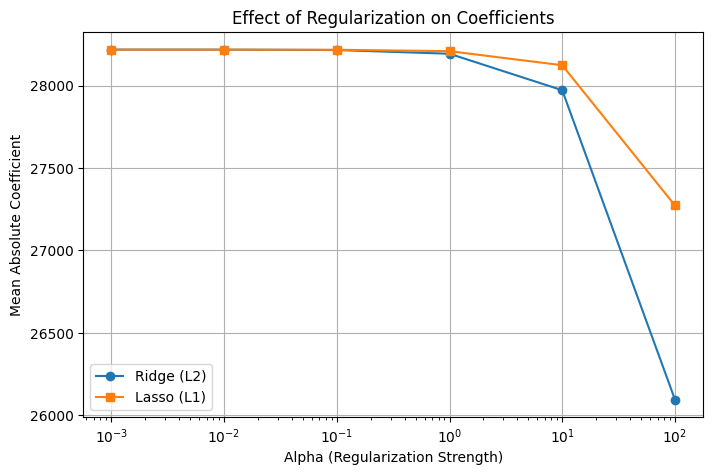

In [7]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Load Dataset (Kaggle)
path = kagglehub.dataset_download("camnugent/california-housing-prices")
print("Dataset path:", path)

data = pd.read_csv(f"{path}/housing.csv")
print("\nDataset Preview:")
print(data.head())

X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)

print("\n--- Baseline Linear Regression ---")
print("Training MSE:", mse_train_lr)
print("Test MSE:", mse_test_lr)

lr_coefficients = lr.coef_
alpha_grid = {"alpha": [0.001, 0.01, 0.1, 1, 10, 100]}

# Ridge Regression (L2)
ridge = Ridge()
ridge_cv = GridSearchCV(
    ridge,
    alpha_grid,
    cv=5,
    scoring="neg_mean_squared_error"
)
ridge_cv.fit(X_train, y_train)
best_ridge = ridge_cv.best_estimator_

print("\nBest Ridge alpha:", ridge_cv.best_params_["alpha"])

# Lasso Regression (L1)
lasso = Lasso(max_iter=10000)
lasso_cv = GridSearchCV(
    lasso,
    alpha_grid,
    cv=5,
    scoring="neg_mean_squared_error"
)
lasso_cv.fit(X_train, y_train)
best_lasso = lasso_cv.best_estimator_
print("Best Lasso alpha:", lasso_cv.best_params_["alpha"])

# Ridge
y_train_pred_ridge = best_ridge.predict(X_train)
y_test_pred_ridge = best_ridge.predict(X_test)

mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)

# Lasso
y_train_pred_lasso = best_lasso.predict(X_train)
y_test_pred_lasso = best_lasso.predict(X_test)

mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)

print("\n--- Ridge Regression (L2) ---")
print("Training MSE:", mse_train_ridge)
print("Test MSE:", mse_test_ridge)

print("\n--- Lasso Regression (L1) ---")
print("Training MSE:", mse_train_lasso)
print("Test MSE:", mse_test_lasso)

coefficients = pd.DataFrame({
    "Linear": lr_coefficients,
    "Ridge": best_ridge.coef_,
    "Lasso": best_lasso.coef_
})

print("\nCoefficient Comparison (L1 vs L2):")
print(coefficients)

print("\nNumber of zero coefficients in Lasso:",
      np.sum(best_lasso.coef_ == 0))

alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_means = []
lasso_means = []

for a in alphas:
    r = Ridge(alpha=a)
    r.fit(X_train, y_train)
    ridge_means.append(np.mean(np.abs(r.coef_)))

    l = Lasso(alpha=a, max_iter=10000)
    l.fit(X_train, y_train)
    lasso_means.append(np.mean(np.abs(l.coef_)))

plt.figure(figsize=(8, 5))
plt.plot(alphas, ridge_means, marker='o', label="Ridge (L2)")
plt.plot(alphas, lasso_means, marker='s', label="Lasso (L1)")
plt.xscale("log")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Mean Absolute Coefficient")
plt.title("Effect of Regularization on Coefficients")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display dataset information
print("Breast Cancer Dataset Loaded Successfully!\n")

print("Total samples:", X.shape[0])
print("Total features:", X.shape[1])

print("\nTraining set:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("\nTest set:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Check class distribution (binary classification)
print("\nClass Distribution:")
print("Class 0 (Malignant):", np.sum(y == 0))
print("Class 1 (Benign):", np.sum(y == 1))


Breast Cancer Dataset Loaded Successfully!

Total samples: 569
Total features: 30

Training set:
X_train shape: (455, 30)
y_train shape: (455,)

Test set:
X_test shape: (114, 30)
y_test shape: (114,)

Class Distribution:
Class 0 (Malignant): 212
Class 1 (Benign): 357



--- Baseline Logistic Regression ---
Training Accuracy: 0.9868131868131869
Test Accuracy: 0.9736842105263158

Baseline Coefficients Shape: (1, 30)

--- Best Hyperparameters ---
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Model Test Accuracy: 0.9912280701754386

--- L1 Regularization ---
Training Accuracy: 0.9802197802197802
Test Accuracy: 0.9649122807017544

--- L2 Regularization ---
Training Accuracy: 0.9824175824175824
Test Accuracy: 0.9912280701754386

Number of zero coefficients (L1): 22
Number of zero coefficients (L2): 0


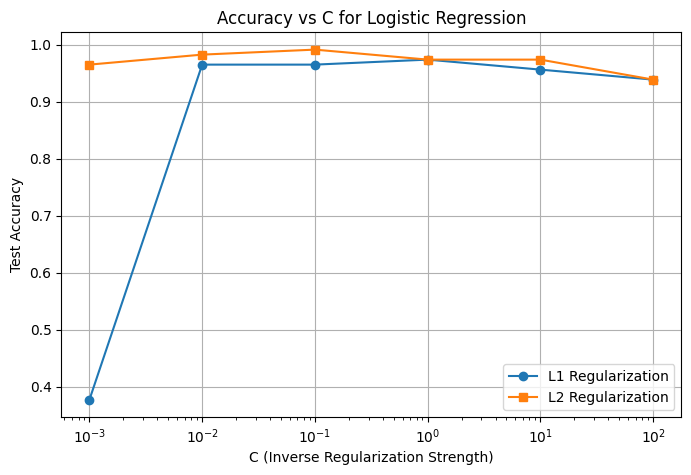

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)

# Train-test split (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling (important for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

# Predictions
y_train_pred_base = baseline_model.predict(X_train)
y_test_pred_base = baseline_model.predict(X_test)

# Accuracy
train_acc_base = accuracy_score(y_train, y_train_pred_base)
test_acc_base = accuracy_score(y_test, y_test_pred_base)

print("\n--- Baseline Logistic Regression ---")
print("Training Accuracy:", train_acc_base)
print("Test Accuracy:", test_acc_base)

# Coefficients
baseline_coefficients = baseline_model.coef_
print("\nBaseline Coefficients Shape:", baseline_coefficients.shape)

param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]  # supports both l1 and l2
}

log_reg = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(
    log_reg,
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("\n--- Best Hyperparameters ---")
print(grid_search.best_params_)

# Test accuracy of best model
y_test_pred_best = best_model.predict(X_test)
best_test_acc = accuracy_score(y_test, y_test_pred_best)

print("Best Model Test Accuracy:", best_test_acc)

# Best C values for L1 and L2
best_C = grid_search.best_params_["C"]

# L1 Regularization
logreg_l1 = LogisticRegression(
    penalty="l1",
    C=best_C,
    solver="liblinear",
    max_iter=1000
)
logreg_l1.fit(X_train, y_train)

# L2 Regularization
logreg_l2 = LogisticRegression(
    penalty="l2",
    C=best_C,
    solver="liblinear",
    max_iter=1000
)
logreg_l2.fit(X_train, y_train)

# Accuracy comparison
train_acc_l1 = accuracy_score(y_train, logreg_l1.predict(X_train))
test_acc_l1 = accuracy_score(y_test, logreg_l1.predict(X_test))

train_acc_l2 = accuracy_score(y_train, logreg_l2.predict(X_train))
test_acc_l2 = accuracy_score(y_test, logreg_l2.predict(X_test))

print("\n--- L1 Regularization ---")
print("Training Accuracy:", train_acc_l1)
print("Test Accuracy:", test_acc_l1)

print("\n--- L2 Regularization ---")
print("Training Accuracy:", train_acc_l2)
print("Test Accuracy:", test_acc_l2)

coef_l1 = logreg_l1.coef_[0]
coef_l2 = logreg_l2.coef_[0]

print("\nNumber of zero coefficients (L1):", np.sum(coef_l1 == 0))
print("Number of zero coefficients (L2):", np.sum(coef_l2 == 0))

C_values = [0.001, 0.01, 0.1, 1, 10, 100]
acc_l1 = []
acc_l2 = []

for c in C_values:
    model_l1 = LogisticRegression(
        penalty="l1", C=c, solver="liblinear", max_iter=1000
    )
    model_l2 = LogisticRegression(
        penalty="l2", C=c, solver="liblinear", max_iter=1000
    )

    model_l1.fit(X_train, y_train)
    model_l2.fit(X_train, y_train)

    acc_l1.append(accuracy_score(y_test, model_l1.predict(X_test)))
    acc_l2.append(accuracy_score(y_test, model_l2.predict(X_test)))

plt.figure(figsize=(8, 5))
plt.plot(C_values, acc_l1, marker='o', label="L1 Regularization")
plt.plot(C_values, acc_l2, marker='s', label="L2 Regularization")
plt.xscale("log")
plt.xlabel("C (Inverse Regularization Strength)")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs C for Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()
